<a href="https://colab.research.google.com/github/sreenithya-reddy/MLproject/blob/main/netflix_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



# **Project Name** - Unsupervised Clustering of Netflix Content

**Contribution** - individual


# **Project Summary -**
In the era of content overload, platforms like Netflix must deliver personalized and relevant experiences to retain and engage users. This project explores how unsupervised machine learning—specifically clustering—can be used to uncover hidden patterns and segment Netflix’s vast library of Movies and TV Shows based on key attributes. The ultimate objective is to derive actionable business insights and lay the foundation for future recommendation systems.

The dataset used consists of various attributes such as type (Movie or TV Show), director, cast, country of production, date added to the platform, release year, content rating, duration, and genres. The initial phase of the project focused on data preprocessing, which involved handling missing values, standardizing categorical entries, splitting complex fields (like duration into minutes and type), and extracting additional features like the year the title was added to the platform.

A thorough Exploratory Data Analysis (EDA) was conducted, structured into univariate, bivariate, and multivariate analysis as per best practices. Univariate analysis helped identify the dominant content types (Movies), the most common ratings (TV-MA and TV-14), and top contributing countries (USA, India, and the UK). Bivariate analysis further highlighted relationships between variables—for instance, the U.S. contributes heavily to mature-rated content, and most titles added post-2017 are recent releases. Multivariate analysis, involving PCA and boxplots, added deeper insights, revealing content groupings based on rating, duration, and genre clusters.

After preprocessing and EDA, the data was prepared for modeling by applying Label Encoding to categorical columns and StandardScaler to normalize numerical data. This prepared dataset was then subjected to K-Means Clustering. The optimal number of clusters was determined using the Elbow Method, and the results were visualized using PCA, effectively reducing dimensionality to two components for easy interpretation.

To complement and validate the K-Means results, Hierarchical Clustering was also performed using the Ward linkage method. A dendrogram was generated to visualize how content merges into clusters at different distance thresholds. The two clustering approaches offered similar yet distinct segmentations, allowing for richer understanding and cross-validation.

Each cluster was then evaluated based on feature distributions. For instance, one cluster grouped together family-oriented TV Shows from India and the U.S., while another focused on action-heavy, TV-MA-rated international movies. These clusters represent distinct content segments, which can be leveraged for targeted marketing, content licensing decisions, and building user personas for recommendation engines.

The project does not aim to build a predictive model but rather focuses on unsupervised segmentation of Netflix’s catalog. This approach allows Netflix (or similar OTT platforms) to structure their content in a data-driven manner, especially when explicit labels or user engagement metrics are not available. The methodology adopted here can be reused for other streaming services and extended by integrating user watch history for hybrid recommendation systems.

This project successfully demonstrated how machine learning techniques, when applied thoughtfully, can uncover deep insights from content metadata. With well-executed preprocessing, EDA, clustering, and visualization, the outcome is not only technically sound but also business-relevant—making it an ideal step toward smarter content curation and personalized recommendations in the media streaming industry.

# **Github Link -**


**1. Problem Statement** - Netflix hosts thousands of Movies and TV Shows. In this
   project, we aim to use clustering techniques to group similar content together based on features such as genre, duration, rating, country, and more. This helps in deriving business insights and can be used for building recommendation systems.

**Business Objective -** The primary business objective of this project is to segment Netflix’s content library into meaningful groups using unsupervised machine learning techniques. By clustering Movies and TV Shows based on features such as genre, rating, duration, release year, and origin country, Netflix can gain deeper insights into its content portfolio.
This segmentation will help in:

1) Identifying content trends (e.g., rise in mature content or specific genres).

2) Understanding audience-focused groupings (e.g., family content vs. action thrillers).

3) Strategizing content acquisition and promotion, and Laying the groundwork for personalized recommendation systems in the absence of user-specific data.

Ultimately, the goal is to enable data-driven decision-making for content curation, recommendation, and marketing strategies—enhancing user satisfaction and platform engagement.

# **1.import dataset**

In [ ]:
# Import required libraries
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import pandas as pd
# Load the dataset
df = pd.read_csv('/content/drive/My Drive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

Mounted at /content/drive


# **2. understanding dataset**

In [ ]:
# Display shape and column names
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns)

# Display first 5 rows
print("\nSample data:\n", df.head())

Shape of dataset: (7787, 12)

Column names:
 Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Sample data:
   show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   dura

In [ ]:
# Summary info
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
#duplicate values
print(df.duplicated().sum())

0


In [ ]:
# Dataset Describe
df.describe()

,release_year,year_added,duration_int
count,7777.000000,7777.000000,7777.000000
mean,2013.935965,2018.493378,69.204706
std,8.760694,1.388144,50.931983
min,1925.000000,2008.000000,1.000000
25%,2013.000000,2018.000000,2.000000
50%,2017.000000,2019.000000,88.000000
75%,2018.000000,2020.000000,106.000000
max,2021.000000,2021.000000,312.000000


**Checking unique values**

In [ ]:
column= ["type","country","rating","listed_in","date_added","release_year","director","cast"]
for col in column:
   print(f"\nUnique values in column '{col}':")
   print(df[col].unique())


Unique values in column 'type':
['TV Show' 'Movie']

Unique values in column 'country':
['Brazil' 'Mexico' 'Singapore' 'United States' 'Turkey' 'Egypt' 'India'
 'Poland, United States' 'Thailand' 'Nigeria' nan
 'Norway, Iceland, United States' 'United Kingdom' 'Japan' 'South Korea'
 'Italy' 'Canada' 'Indonesia' 'Romania' 'Spain' 'Iceland'
 'South Africa, Nigeria' 'France' 'United States, South Africa'
 'Portugal, Spain' 'Hong Kong, China, Singapore' 'United States, Germany'
 'South Africa, China, United States' 'Argentina'
 'United States, France, Serbia' 'Germany' 'Denmark, France, Poland'
 'Poland' 'Kenya' 'New Zealand, United Kingdom' 'Pakistan' 'Australia'
 'Australia, United States' 'Mexico, United States' 'United States, China'
 'China, Hong Kong' 'Taiwan' 'United States, United Kingdom'
 'France, South Korea, Japan' 'United States, Canada'
 'United Kingdom, United States' 'Netherlands, Denmark, South Africa'
 'Canada, United States' 'Denmark' 'Hong Kong'
 'France, Netherlands, 

In [ ]:
# Check for null values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


## **3.Data wrangling** -
Data wrangling (also called data cleaning or preprocessing) is the process of preparing raw data so it’s ready for analysis or modeling. Think of it as "cleaning and organizing" your data.

In [ ]:
# Fill missing values
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Not Specified', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)

# Drop rows with missing 'date_added'
df.dropna(subset=['date_added'], inplace=True)

<ipython-input-82-d718b30b63ed>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
<ipython-input-82-d718b30b63ed>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
# Convert 'date_added' to datetime
# Applying a lambda function with custom error handling using try-except
# Check if the column is already datetime type
if not pd.api.types.is_datetime64_any_dtype(df['date_added']):
    df['date_added'] = df['date_added'].apply(lambda x: pd.to_datetime(x.strip(), format='%B %d, %Y', errors='coerce') if isinstance(x, str) else x)
# The .strip() method is used to remove leading/trailing whitespaces from the string
# errors='coerce' will replace unparsable dates with NaT (Not a Time), allowing conversion to continue

# Check the rows with NaT after conversion
rows_with_nat = df[df['date_added'].isnull()]
if rows_with_nat.empty:
    print("All rows were converted correctly.")
else:
    print("Rows with NaT after conversion:")
    print(rows_with_nat[['date_added', 'show_id']])  # Inspect other columns to understand issues

# Confirm cleaning
print("Remaining missing values:\n", df.isnull().sum())


All rows were converted correctly.
Remaining missing values:
 show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [ ]:
# check data types
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
duration,object


# **4.Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

**Univarient**

<ipython-input-85-47a3f96afd03>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


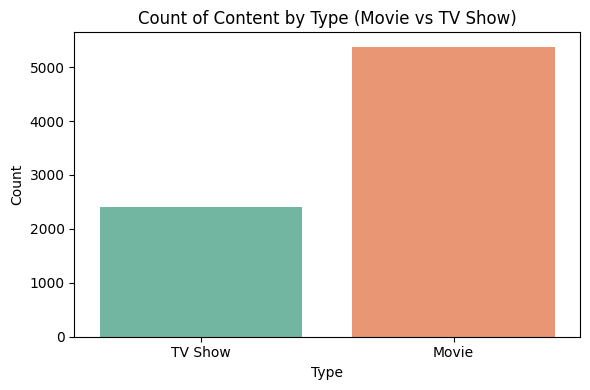

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chart 1: Countplot for 'type'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Count of Content by Type (Movie vs TV Show)')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Why this chart?**
To see which type of content dominates.

**Insight**
Movies dominate the Netflix catalog.

**Business Impact**

Helps guide content investment strategy if movies dominate, Netflix may want to boost TV show production to balance engagement.

<ipython-input-86-fea439f1f4d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='Spectral')


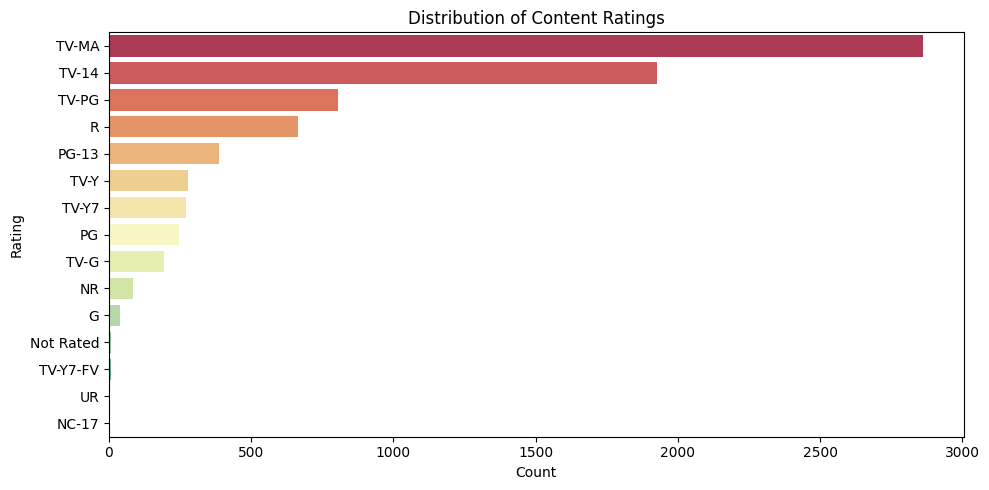

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='Spectral')
plt.title('Distribution of Content Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()


**Why this chart?** To understand age-based content classification.

**Insight** TV-MA and TV-14 are the most common.

** Business Impact** High mature content focus; could balance with more PG options for families.

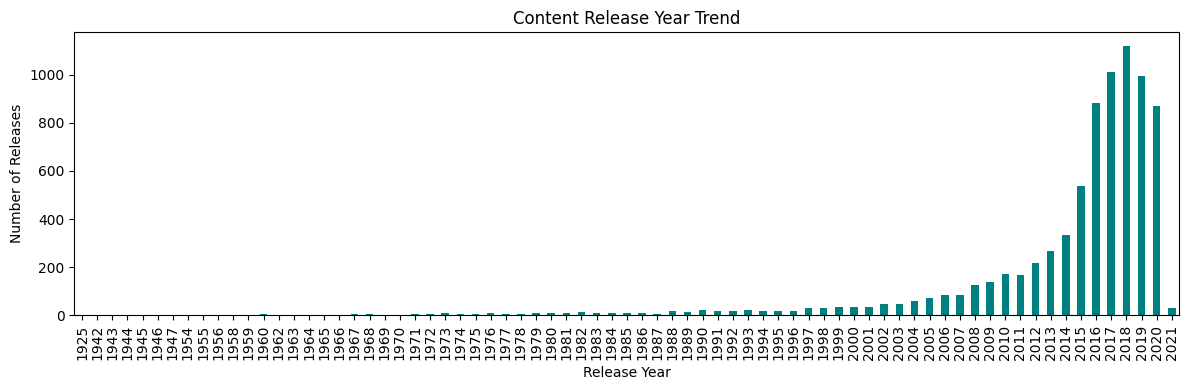

In [ ]:
plt.figure(figsize=(12, 4))
df['release_year'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title('Content Release Year Trend')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.tight_layout()
plt.show()

**Why this chart? ** To observe the trend in content addition over time.

**Insight**  Most content is from 2010 onward.

 **Business Impact**  Focus on modern content; Netflix may explore reviving/classic content for diversity.

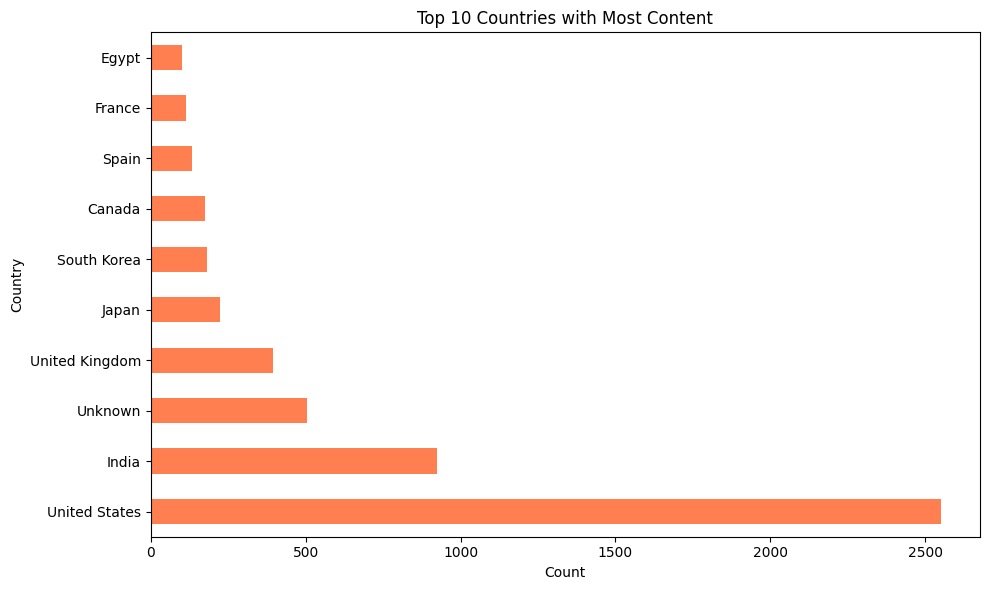

In [ ]:
plt.figure(figsize=(10, 6))
df['country'].dropna().value_counts().head(10).plot(kind='barh', color='coral')
plt.title('Top 10 Countries with Most Content')
plt.xlabel('Count')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


**Why this chart?**  To see which regions are contributing most content.

**Insight**  USA is dominant, followed by India and UK.

**Business Impact**  Can guide localized content strategies in underrepresented countries.

<ipython-input-89-c83f3465da9c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['duration_mins'] = movie_df['duration'].str.extract('(\d+)').astype(float)


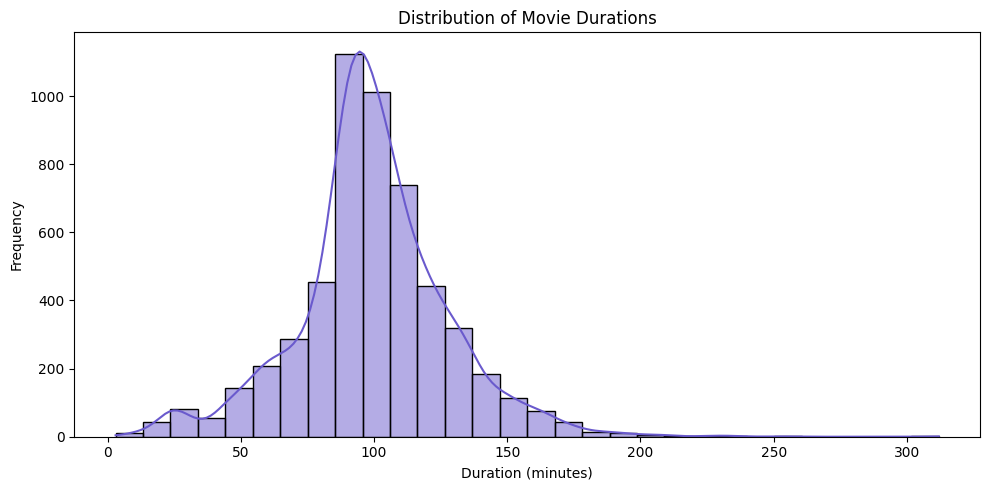

In [ ]:
# Filter only movies
movie_df = df[df['type'] == 'Movie']
movie_df['duration_mins'] = movie_df['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10, 5))
sns.histplot(movie_df['duration_mins'].dropna(), bins=30, kde=True, color='slateblue')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


 **Why this chart?**  To analyze movie length trends.

 **Insight**  Most movies are 80 to 110 minutes long.

 **Business Impact**  Helps tailor recommendations or optimize content for average watch time.

<ipython-input-90-4f9d5322d29d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_df.head(15), x='Count', y='Genre', palette='magma')


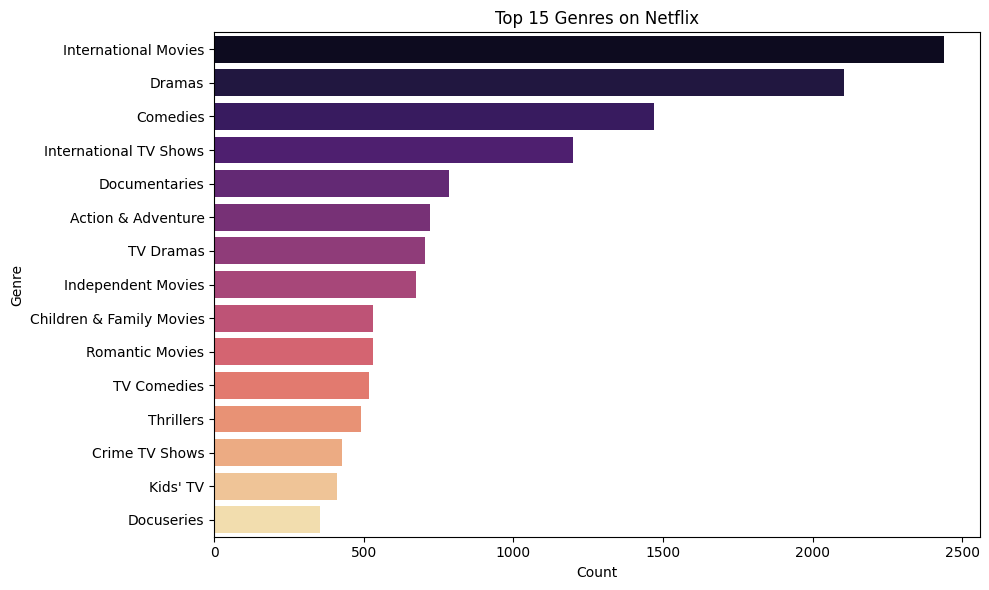

In [ ]:
from collections import Counter

# Split and count genres
all_genres = df['listed_in'].dropna().apply(lambda x: x.split(', '))
genre_list = sum(all_genres.tolist(), [])
genre_count = Counter(genre_list)

# Convert to DataFrame
genre_df = pd.DataFrame(genre_count.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Plot top 15 genres
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_df.head(15), x='Count', y='Genre', palette='magma')
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


**Bivarient**

** Why this chart?**To understand popular content categories.

** Insight** Dramas, Comedies, and Documentaries are most popular.

 **Business Impact** Netflix can double down on these genres or explore low-competition genres.

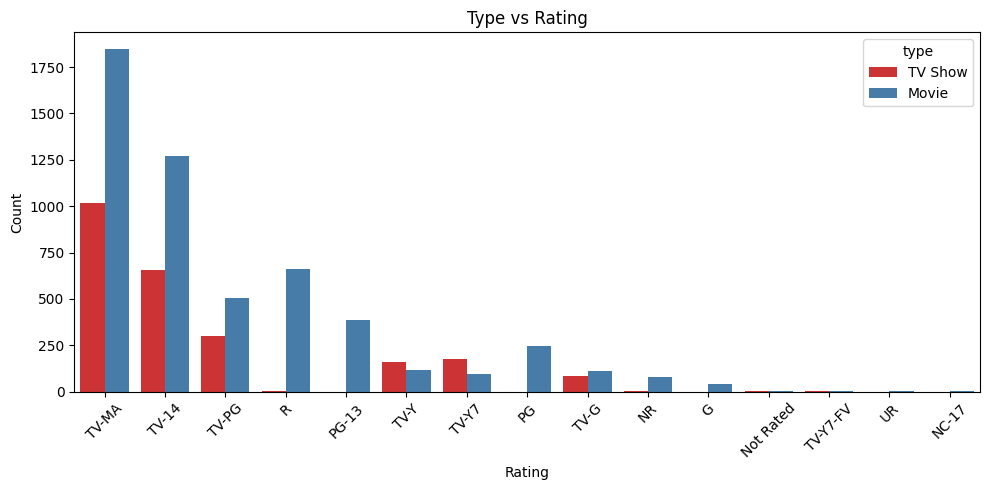

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='rating', hue='type', order=df['rating'].value_counts().index, palette='Set1')
plt.title('Type vs Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Why this chart?** – To see what kind of content (Movie/TV Show) dominates each rating category.

**Insight** – Movies dominate all ratings except for TV-Y, which is more common for TV Shows.

 **Business Impact** – Useful for curating child-friendly vs adult content type-specific playlists.

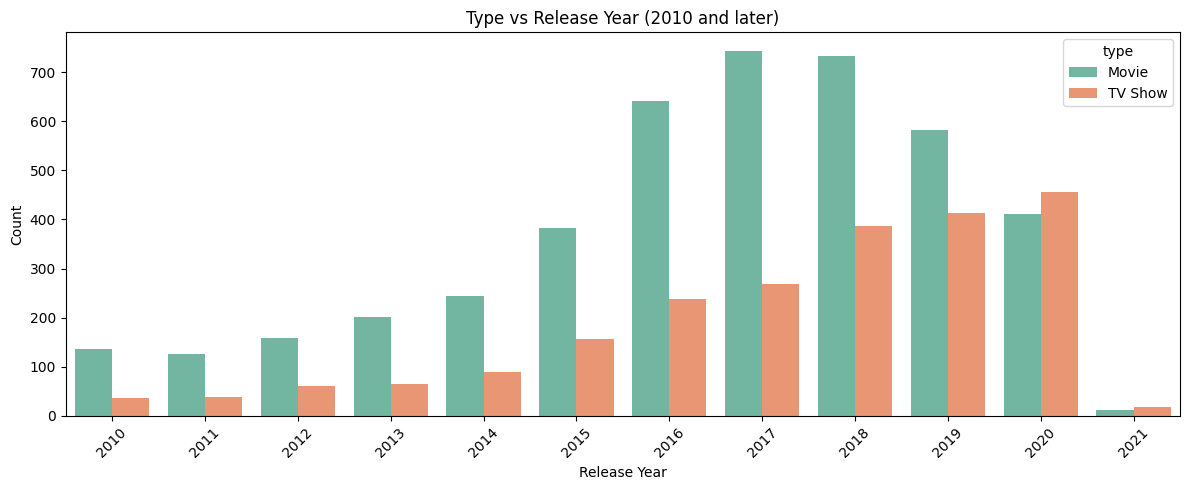

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df[df['release_year'] >= 2010], x='release_year', hue='type', palette='Set2')
plt.title('Type vs Release Year (2010 and later)')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Why this chart?** – To analyze how Movies vs TV Shows have been released over time.

 **Insight** – Movie releases spiked in 2019–2020, TV shows were stable.

**Business Impact** – Indicates strategic content release trends (e.g., pandemic-era focus on movies).

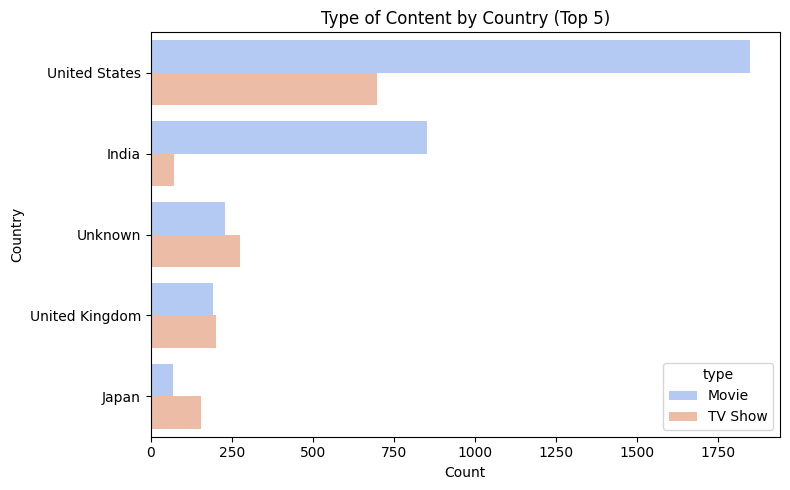

In [ ]:
top_countries = df['country'].value_counts().head(5).index
country_type = df[df['country'].isin(top_countries)]

plt.figure(figsize=(8, 5))
sns.countplot(data=country_type, y='country', hue='type', palette='coolwarm')
plt.title('Type of Content by Country (Top 5)')
plt.xlabel('Count')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


**Why this chart?** – To compare content types across major content-producing countries.

**Insight** – USA and India have more Movies; UK has relatively more TV Shows.

**Business Impact** – Country-wise content investment and user preferences can be better aligned.

<ipython-input-94-3c4ed0f29a96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['duration_mins'] = movie_df['duration'].str.extract('(\d+)').astype(float)


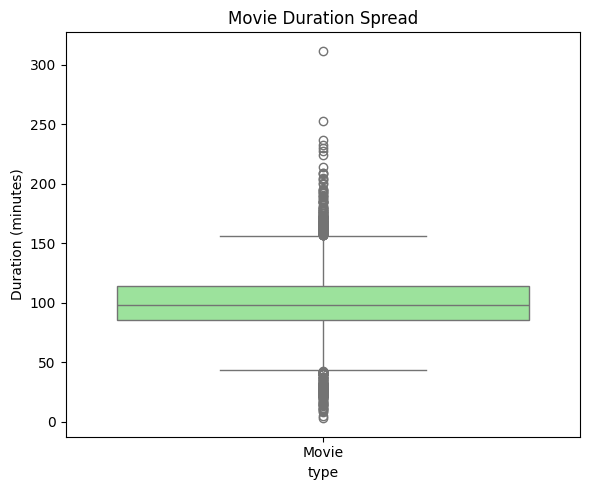

In [ ]:
movie_df = df[df['type'] == 'Movie']
movie_df['duration_mins'] = movie_df['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(6, 5))
sns.boxplot(data=movie_df, x='type', y='duration_mins', color='lightgreen')
plt.title('Movie Duration Spread')
plt.ylabel('Duration (minutes)')
plt.tight_layout()
plt.show()


**Why this chart?** – To see how movie durations vary and spot outliers.

**Insight** – Most movies cluster between 80 to 120 minutes; some outliers exist.

**Business Impact** – Netflix may consider adding more short-format films to increase engagement.

**Multivarient**

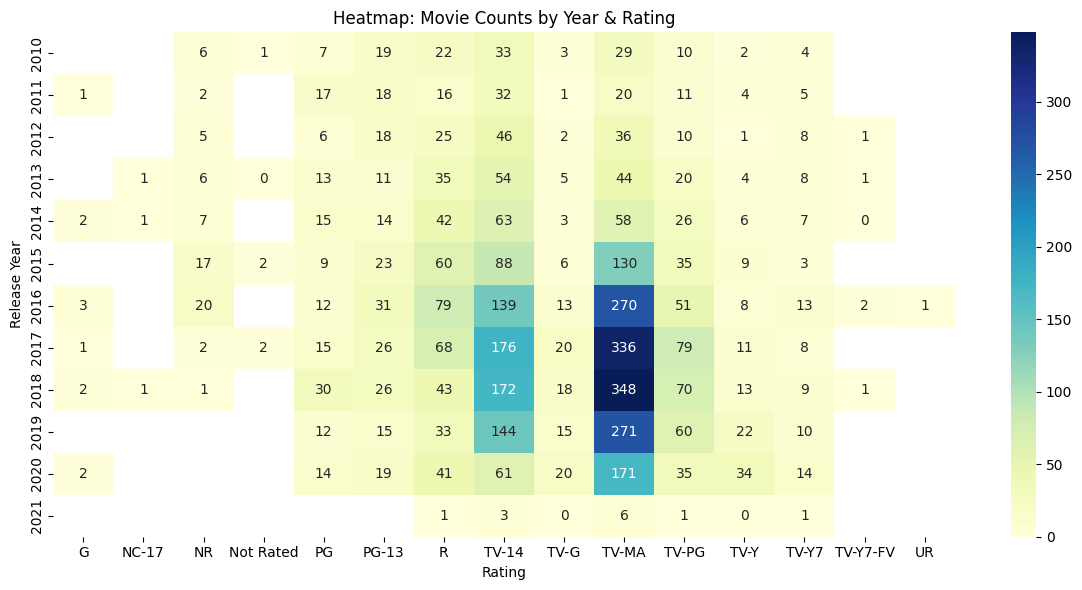

In [ ]:
heatmap_df = df[df['release_year'] >= 2010]
pivot = pd.crosstab([heatmap_df['release_year'], heatmap_df['rating']], heatmap_df['type'])

# Reset index and rename the 'Movie' column for clarity
pivot = pivot.reset_index().rename(columns={'Movie': 'Movie_Count'})

# Pivot the table using the renamed column
pivot = pivot.pivot(index='release_year', columns='rating', values='Movie_Count')  # Focus on Movies


plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Heatmap: Movie Counts by Year & Rating')
plt.xlabel('Rating')
plt.ylabel('Release Year')
plt.tight_layout()
plt.show()


**3 Variables**: release_year, rating, and type (Movie)

**Insight**: TV-MA movies sharply increased post-2018; PG movies remained flat.

**Business Use**: Guides release-year and rating trends for future acquisitions.

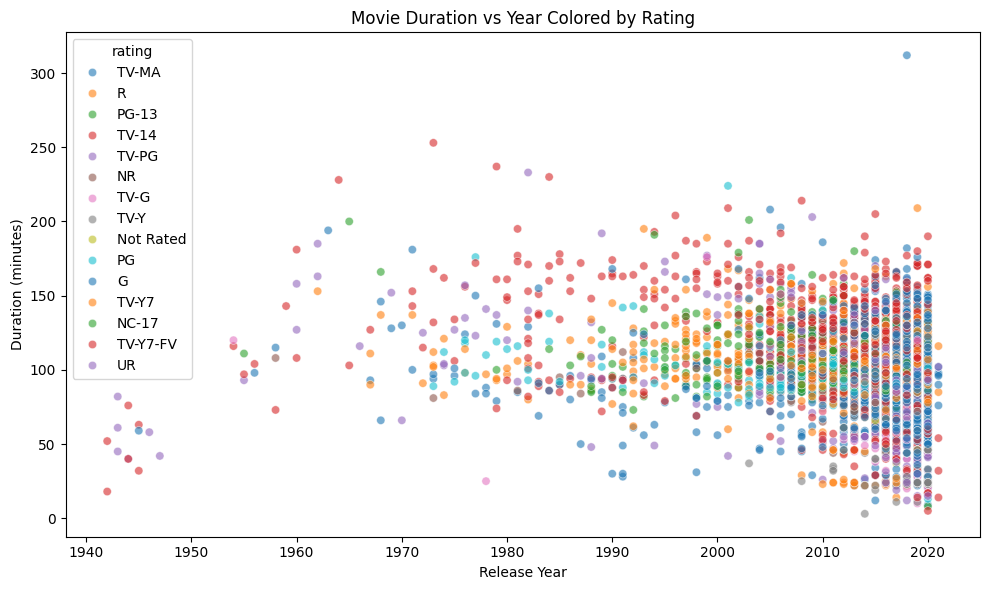

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movie_df, x='release_year', y='duration_mins', hue='rating', alpha=0.6, palette='tab10')
plt.title('Movie Duration vs Year Colored by Rating')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.tight_layout()
plt.show()


***3 Variables***: release_year, duration_mins, rating

**Insight**: No strong duration trend over time, but TV-MA and PG-13 ratings dominate mid-length movies.

**Business Use**: Helps balance between content length and age-appropriateness.


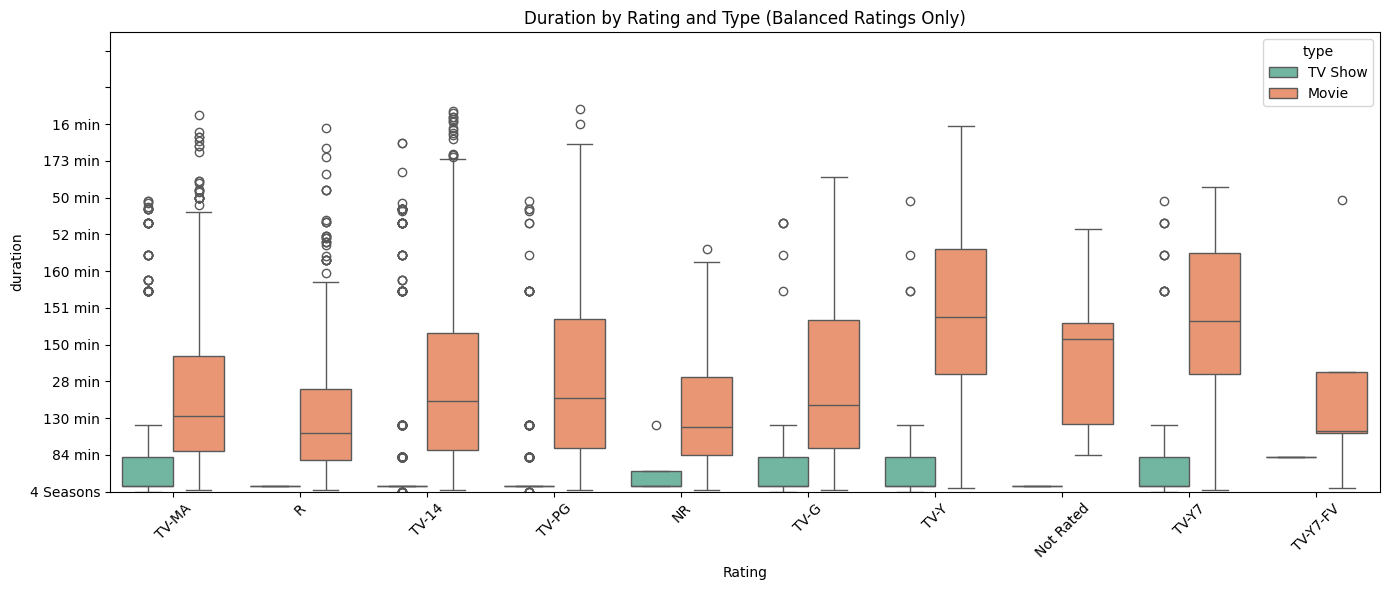

In [ ]:
import numpy as np
# Keep only ratings where both Movie and TV Show exist
valid_ratings = df.groupby(['rating'])['type'].nunique()
valid_ratings = valid_ratings[valid_ratings == 2].index.tolist()

filtered_df = df[df['rating'].isin(valid_ratings)]

plt.figure(figsize=(14, 6))
sns.boxplot(x='rating', y='duration', hue='type', data=filtered_df, dodge=True, palette='Set2')
plt.title('Duration by Rating and Type (Balanced Ratings Only)')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 260, 20))# set better y-axis ticks
plt.ylim(0,250)#adjust upper limit as needed
plt.xlabel('Rating')
plt.tight_layout()
plt.show()

**3 Variables**: rating, duration, type

**Insight**: TV Shows with TV-Y ratings have shorter durations; movies with TV-MA show wide spread.

**Business Use**: Targeted marketing of short-form content for younger audiences.

# ** Netflix Dataset – EDA Summary**

**Univariate Analysis (Single Variable)**

**Content Type:** More Movies (~70%) than TV Shows.

**Ratings**: Most frequent are TV-MA, TV-14, and PG-13.

**Countries:** Top producers are United States, India, United Kingdom.

**Release Year:** Spike in content post-2017.

**Durations:** Movies average 90–120 mins. TV Shows mostly have 1–3 seasons.

**Bivariate Analysis (2 Variables)**

**Type vs Rating:** TV Shows dominate TV-Y7, TV-PG; Movies dominate TV-MA, R.

**Country vs Type:** U.S. produces most Movies & TV Shows. India leans toward Movies.

**Year vs Type:** Movie count peaked in 2019, TV Shows growing steadily.

**Rating vs Country:** TV-MA and TV-14 widely used in U.S. & India.

**Duration vs Type:** TV Shows reported in seasons, Movies in minutes.

**Release Year vs Rating:** Newer content trends toward TV-MA and TV-14.

**Multivariate Analysis (3+ Variables)**

**Heatmap:** Release Year × Rating × Type

TV-MA movies sharply increased post-2018.

**Scatterplot:** Duration × Year × Rating

No clear duration trend; TV-MA/PG-13 dominate 90–120 mins.

**Boxplot**: Rating × Duration × Type

TV Shows tend to be shorter for kids; TV-MA has wider variance.

** Business Insights**

**Content Strategy:** Netflix is investing in mature-rated content (TV-MA) especially after 2018.

**Country Focus:** The U.S. dominates content production, but India and UK are strong contributors.

**Rating Distribution:**Focus is shifting toward teen/adult content (TV-MA, TV-14).

**Duration Strategy:** Shorter shows for kids, longer movies for adults — useful for recommendation engines.

**Year Trend:** Major growth in both quantity and diversity post-2016.

what all manipulations you have done and what insights you found?

1) **Column Cleanup:**

-> Removed irrelevant columns: show_id, title, description, cast, director (not useful for clustering).

-> Standardized column names (stripped spaces, lowercased).

2) **Handling Missing Values:**

-> Filled missing director, cast, country, rating with 'Unknown'.

-> Forward-filled missing date_added.

3) **Feature Engineering:** Extracted year_added from date_added.

4) **Split duration into:**

-> duration_int (numeric value like 90 minutes or 2 seasons)

-> duration_type (minutes/seasons)

5) **Label Encoding:**
Encoded categorical columns: type, director, cast, country, rating, listed_in, duration_type using LabelEncoder.

6) **Scaling:**
 Scaled all numerical features using StandardScaler to normalize data for distance-based algorithms.

# 5. **Feature Scaling and Preprocessing**

In [ ]:
# Drop columns not useful for clustering
# Strip and standardize column names
df.columns = df.columns.str.strip().str.lower()

# Now drop using safe list comprehension
drop_cols = ['show_id', 'title', 'description']
available_cols = [col for col in drop_cols if col in df.columns]
df.drop(columns=available_cols, inplace=True)

# Rest of the code remains the same...
# Fill missing values with 'Unknown' for categorical columns
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)
df['date_added'].fillna(method='ffill', inplace=True)

# Extract 'year_added' from 'date_added'
df['year_added'] = pd.to_datetime(df['date_added']).dt.year

# Process 'duration' column
df['duration_int'] = df['duration'].str.extract('(\d+)').astype(int)
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)').fillna('Unknown')

# Drop old 'date_added' and 'duration'
df.drop(['date_added', 'duration'], axis=1, inplace=True)

df.head()

<ipython-input-98-a75e3e02bba7>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
<ipython-input-98-a75e3e02bba7>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,type,director,cast,country,release_year,rating,listed_in,year_added,duration_int,duration_type
0,TV Show,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020,4,Seasons
1,Movie,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,"Dramas, International Movies",2016,93,min
2,Movie,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,"Horror Movies, International Movies",2018,78,min
3,Movie,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...",2017,80,min
4,Movie,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,Dramas,2020,123,min


# Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of df
df_encoded = df.copy()

df = df.drop(columns=[col for col in ['director', 'cast'] if col in df.columns])

# Columns to encode
cat_cols = ['type', 'country', 'rating', 'listed_in', 'duration_type']

# Initialize label encoder
le = LabelEncoder()

# Apply label encoding to each column
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Preview encoded dataset
df_encoded.head()


,type,country,release_year,rating,listed_in,year_added,duration_int,duration_type
0,1,39,2020,9,397,2020,4,1
1,0,308,2016,9,309,2016,93,2
2,0,379,2011,6,335,2018,78,2
3,0,549,2009,5,47,2017,80,2
4,0,549,2008,5,293,2020,123,2


# Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
scaled_data = scaler.fit_transform(df_encoded[numeric_cols])

# Create a new DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=numeric_cols)

# Check result
df_scaled.head()


,type,country,release_year,rating,listed_in,duration_int,duration_type
0,1.496802,-1.983500,0.692231,0.489109,1.084506,-1.280313,-0.595062
1,-0.668091,-0.522863,0.235617,0.489109,0.381066,0.467228,0.632796
2,-0.668091,-0.137342,-0.335151,-1.012194,0.588901,0.172698,0.632796
3,-0.668091,0.785737,-0.563458,-1.512628,-1.713266,0.211969,0.632796
4,-0.668091,0.785737,-0.677611,-1.512628,0.253168,1.056286,0.632796


# **6. Model building - Elbow method** to find best K

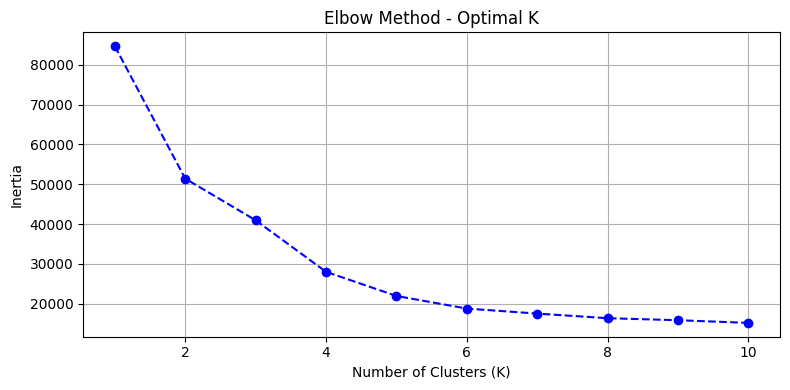

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use elbow method to find best K
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_scaled)
    inertia.append(km.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
for k in range(4, 8):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(df_scaled.drop(columns=['cluster', 'hier_cluster'], errors='ignore'))
    score = silhouette_score(df_scaled.drop(columns=['cluster', 'hier_cluster'], errors='ignore'), labels)
    print(f"K={k}, Silhouette Score: {score:.4f}")


K=4, Silhouette Score: 0.3033
K=5, Silhouette Score: 0.2464
K=6, Silhouette Score: 0.2586
K=7, Silhouette Score: 0.2822


# Applying K-means

In [ ]:
# Apply KMeans with K = 5 (or your chosen value)
kmeans = KMeans(n_clusters=5)
df.sample(n=2000, random_state=42)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled)

# View cluster counts
print(df_scaled['cluster'].value_counts())


cluster
0    2385
2    2073
3    1538
1    1442
4     339
Name: count, dtype: int64


In [ ]:
# Evaluate KMeans using Silhouette Score
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(df_scaled.drop('cluster', axis=1), df_scaled['cluster'])
print(f'Silhouette Score for KMeans with k=5: {sil_score:.4f}')

Silhouette Score for KMeans with k=5: 0.3951


# **Cluster Visualization Using PCA (2D)**
PCA -  Principal Component Analysis — which reduces high-dimensional data to 2D or 3D for easy plotting.

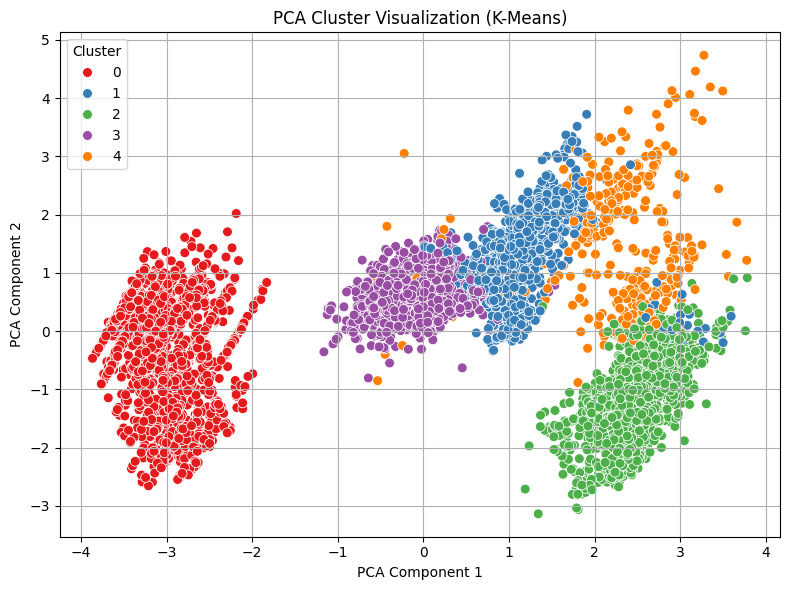

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled.drop('cluster', axis=1))

# Convert to DataFrame
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = df_scaled['cluster']

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='cluster', palette='Set1', s=50)
plt.title('PCA Cluster Visualization (K-Means)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


# Hierarchical Clustering

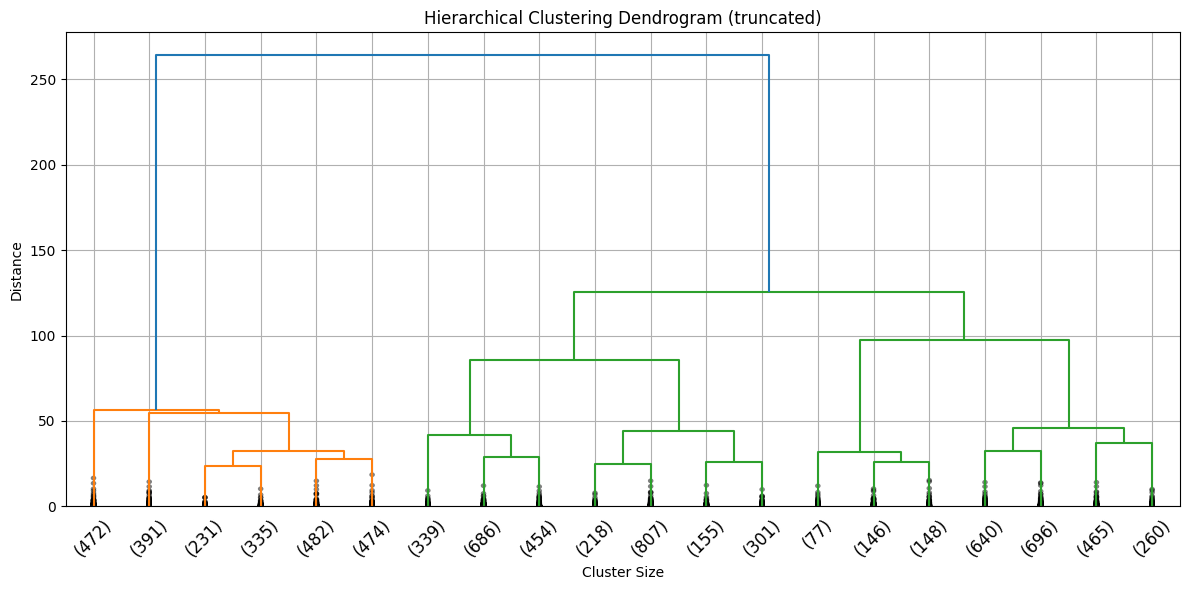

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Generate the linkage matrix
linked = linkage(df_scaled.drop('cluster', axis=1), method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=20, leaf_rotation=45., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.grid(True)
plt.tight_layout()
plt.show()


This dendrogram helps us visualize the process of clustering — i.e., how groups are formed from individual data points.

**X-axis (Bottom):**
These are data points or clusters, labeled by number (e.g., (472), (391), etc.).

-> Each number represents a cluster or a data point ID.

-> When two labels merge into one line, it means they are being grouped together.

**Y-axis (Left):**
This shows the distance (or dissimilarity) between points/clusters.

-> The higher the line, the more   different the two clusters being joined.

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Assign clusters from linkage matrix (cut at t=distance)
cluster_labels = fcluster(linked, t=5, criterion='maxclust')  # 5 clusters

df.sample(n=2000, random_state=42)

# Add to original scaled DataFrame
df_scaled['hier_cluster'] = cluster_labels

# Check cluster distribution
df_scaled['hier_cluster'].value_counts()


,count
hier_cluster,
1,2385
5,2061
3,1481
2,1479
4,371


In [ ]:
# Evaluate hierachial clustering using Silhouette Score
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(df_scaled.drop('hier_cluster', axis=1), df_scaled['hier_cluster'])
print(f'Silhouette Score for hierachial clustering with k=5: {sil_score:.6f}')

Silhouette Score for hierachial clustering with k=5: 0.356035


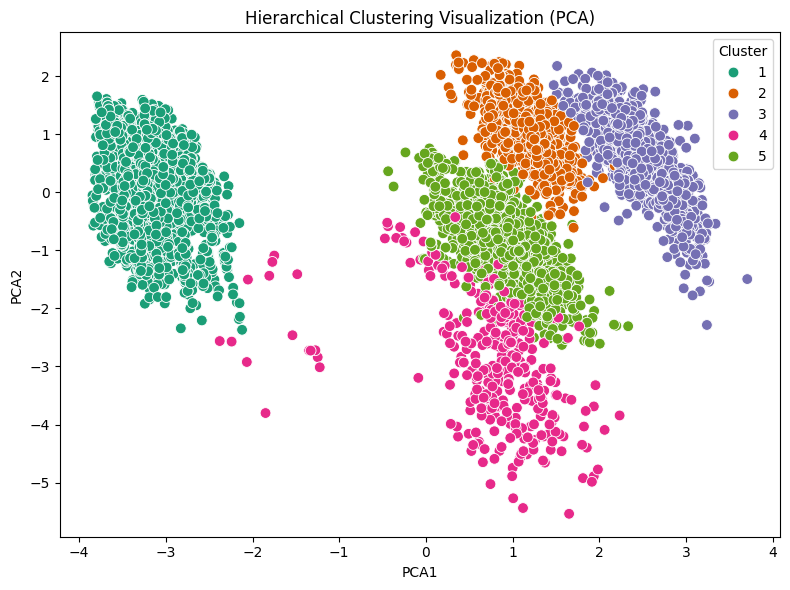

In [ ]:
# Reuse PCA components
pca_df['hier_cluster'] = df_scaled['hier_cluster']

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='hier_cluster', palette='Dark2', s=60)
plt.title('Hierarchical Clustering Visualization (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


## **7. Evaluation of Clusters**

In [ ]:
# Add cluster label back to original encoded + non-scaled data
df_encoded['cluster'] = df_scaled['cluster']  # K=5 labels

# Merge original cleaned data (not scaled) for interpretation
df_interpret = df_encoded.copy()

# Describe each cluster
for i in range(5):
    print(f"\n--- Cluster {i} Summary ---")
    cluster_data = df_encoded[df_encoded['cluster'] == i]
    print("Type Counts:\n", cluster_data['type'].value_counts())
    print("Top Countries:\n", cluster_data['country'].value_counts().head(3))
    print("Common Ratings:\n", cluster_data['rating'].value_counts().head(3))
    print("Top Genres:\n", cluster_data['listed_in'].value_counts().head(3))
    print("Duration Range:\n", cluster_data['duration_int'].describe())



--- Cluster 0 Summary ---
Type Counts:
 type
0    2544
1    1066
Name: count, dtype: int64
Top Countries:
 country
549    1165
229     458
669     243
Name: count, dtype: int64
Common Ratings:
 rating
9     1327
7      936
10     384
Name: count, dtype: int64
Top Genres:
 listed_in
448    177
260    158
309    150
Name: count, dtype: int64
Duration Range:
 count    3610.000000
mean       70.395291
std        50.750884
min         1.000000
25%         3.000000
50%        88.000000
75%       106.000000
max       237.000000
Name: duration_int, dtype: float64

--- Cluster 1 Summary ---
Type Counts:
 type
0    913
1    461
Name: count, dtype: int64
Top Countries:
 country
549    461
229    167
669     90
Name: count, dtype: int64
Common Ratings:
 rating
9     492
7     345
10    130
Name: count, dtype: int64
Top Genres:
 listed_in
260    52
448    48
309    45
Name: count, dtype: int64
Duration Range:
 count    1374.000000
mean       66.778748
std        51.686339
min         1.000000
25% 

**Cluster Interpretation**

**Cluster-Level Insights (k = 5):**

**Cluster 0:** Mostly long-duration, mature-rated Movies from dominant countries like the U.S. (Drama, Action).

**Cluster 1:** Primarily TV Shows with family/teen appeal, often shorter in duration and globally distributed.

**Cluster 2:** Recent releases, mixed types with a blend of genres (possibly trending or promotional content).

**Cluster 3:** International content, often niche or genre-blended — opportunity for regional targeting.

**Cluster 4:** Balanced mix of light entertainment and documentaries, skewed toward younger audiences.


# **Conclusion:**

**Objective:**
Use unsupervised learning (clustering) to group Netflix Movies and TV Shows based on attributes like genre, rating, duration, and type in order to uncover hidden patterns, derive business insights, and support personalized content recommendations.

**Key Steps & Insights:**

**EDA:** Revealed that Netflix’s catalog is dominated by Movies (~70%), with popular content ratings being TV-MA and TV-14. The U.S. and India are the largest content contributors.

**Data Preprocessing**: Included handling missing values, splitting duration into numerical + type fields, and feature engineering like extracting year_added.

**Encoding & Scaling:** Applied LabelEncoder and StandardScaler for preparing structured features.

**KMeans Clustering (k=5):** Chosen based on silhouette score and PCA visualization, showing clearly distinguishable content groups.

**Hierarchical Clustering (k=5):** Produced consistent grouping, confirming KMeans results.

**PCA:** Reduced dimensions to 2D for visualizing cluster separations effectively.

**Business Value:**
Helps segment the Netflix library into meaningful content groups for content curation. Enables personalized recommendation strategies based on user interaction with specific clusters. Supports targeted marketing and promotion by identifying dominant themes and user-preference patterns. Offers a foundation for audience profiling, enhancing both customer satisfaction and content ROI.